In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the dataset and understand the features and target variable. 4 points

In [2]:
names=['IR', 'MR', 'FF', 'Cred', 'Compe','OR', 'Class']
# IR :Industrial Risk {P,A,N}
# MR : Management Risk {P,A,N}
# FF :Financial Flexibility {P,A,N}
# Cred :Credibility {P,A,N}
# Compe : Competitiveness {P,A,N}
# OR :Operating Risk: {P,A,N}
# Class :  {B,NB}
# Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

In [3]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt',header=None, names=names)

In [ ]:
#df = pd.read_excel("out.xlsx", header=None, names=names)

In [4]:
df.head()

,IR,MR,FF,Cred,Compe,OR,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
df.info() # all data types are object with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
Cred     250 non-null object
Compe    250 non-null object
OR       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
df.shape

(250, 7)

In [7]:
df.isnull().sum() #  any null values

IR       0
MR       0
FF       0
Cred     0
Compe    0
OR       0
Class    0
dtype: int64

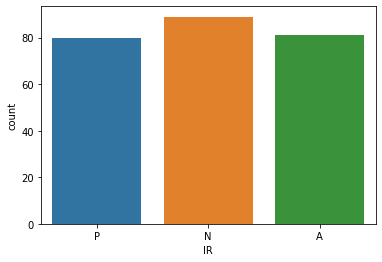

In [8]:
sns.countplot('IR',data=df) # count plot

In [9]:
df['IR'].value_counts()

N    89
A    81
P    80
Name: IR, dtype: int64

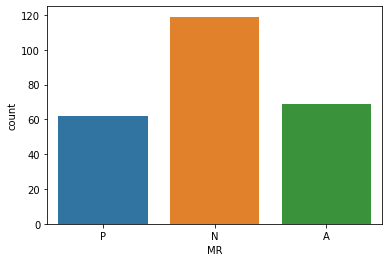

In [18]:
sns.countplot('MR',data=df) # count plot

In [10]:
df['MR'].value_counts()

N    119
A     69
P     62
Name: MR, dtype: int64

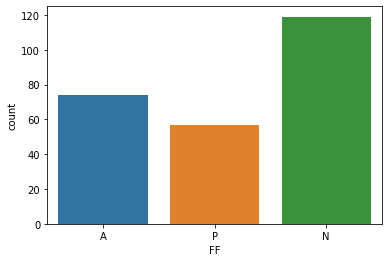

In [20]:
sns.countplot('FF',data=df) # count plot

In [12]:
df['FF'].value_counts()

N    119
A     74
P     57
Name: FF, dtype: int64

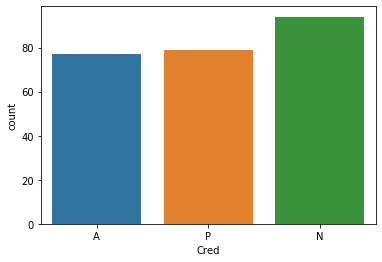

In [13]:
sns.countplot('Cred',data=df) # count plot

In [14]:
df['Cred'].value_counts()

N    94
P    79
A    77
Name: Cred, dtype: int64

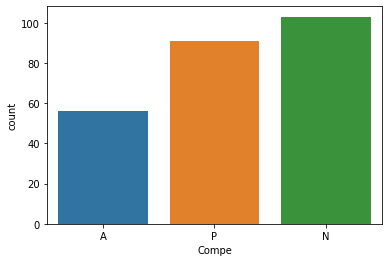

In [15]:
sns.countplot('Compe',data=df) # count plot

In [16]:
df['Compe'].value_counts()

N    103
P     91
A     56
Name: Compe, dtype: int64

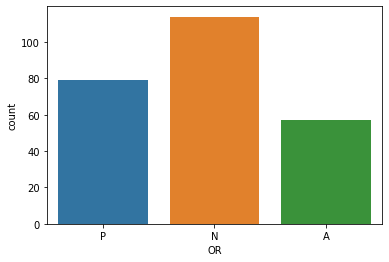

In [17]:
sns.countplot('OR',data=df) # count plot

In [18]:
df['OR'].value_counts()

N    114
P     79
A     57
Name: OR, dtype: int64

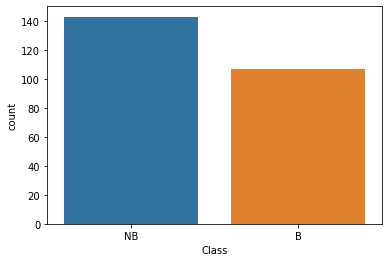

In [19]:
sns.countplot('Class',data=df) # count plot

In [20]:
df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

# Encode independent features. 4 points

In [22]:

## need to convert object variable into to category
#l=['IR', 'MR', 'FF', 'Cred', 'Compe','OR', 'Class']
dummy=pd.get_dummies(df[['IR', 'MR', 'FF', 'Cred', 'Compe','OR']])

In [23]:
dummy.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
# concate dummy columns

In [24]:
df=pd.concat([df,dummy],axis=1)

In [25]:
df.head()

,IR,MR,FF,Cred,Compe,OR,Class,IR_A,IR_N,IR_P,...,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
0,P,P,A,A,A,P,NB,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,N,N,A,A,A,N,NB,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,A,A,A,A,A,A,NB,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,P,P,P,P,P,P,NB,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,N,N,P,P,P,N,NB,0,1,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
#Drop original columns

In [26]:
xyz=['IR', 'MR', 'FF', 'Cred', 'Compe','OR']
df=df.drop(xyz,axis=1)

In [27]:
df.head()

,Class,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
0,NB,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,NB,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,NB,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,NB,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,NB,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

## need to convert object variable into to category

df['Class']=labelencoder.fit_transform(df['Class'])  


In [34]:
df.head()

,Class,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [33]:
df.info() # data type converted into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
Class      250 non-null int32
IR_A       250 non-null uint8
IR_N       250 non-null uint8
IR_P       250 non-null uint8
MR_A       250 non-null uint8
MR_N       250 non-null uint8
MR_P       250 non-null uint8
FF_A       250 non-null uint8
FF_N       250 non-null uint8
FF_P       250 non-null uint8
Cred_A     250 non-null uint8
Cred_N     250 non-null uint8
Cred_P     250 non-null uint8
Compe_A    250 non-null uint8
Compe_N    250 non-null uint8
Compe_P    250 non-null uint8
OR_A       250 non-null uint8
OR_N       250 non-null uint8
OR_P       250 non-null uint8
dtypes: int32(1), uint8(18)
memory usage: 5.4 KB


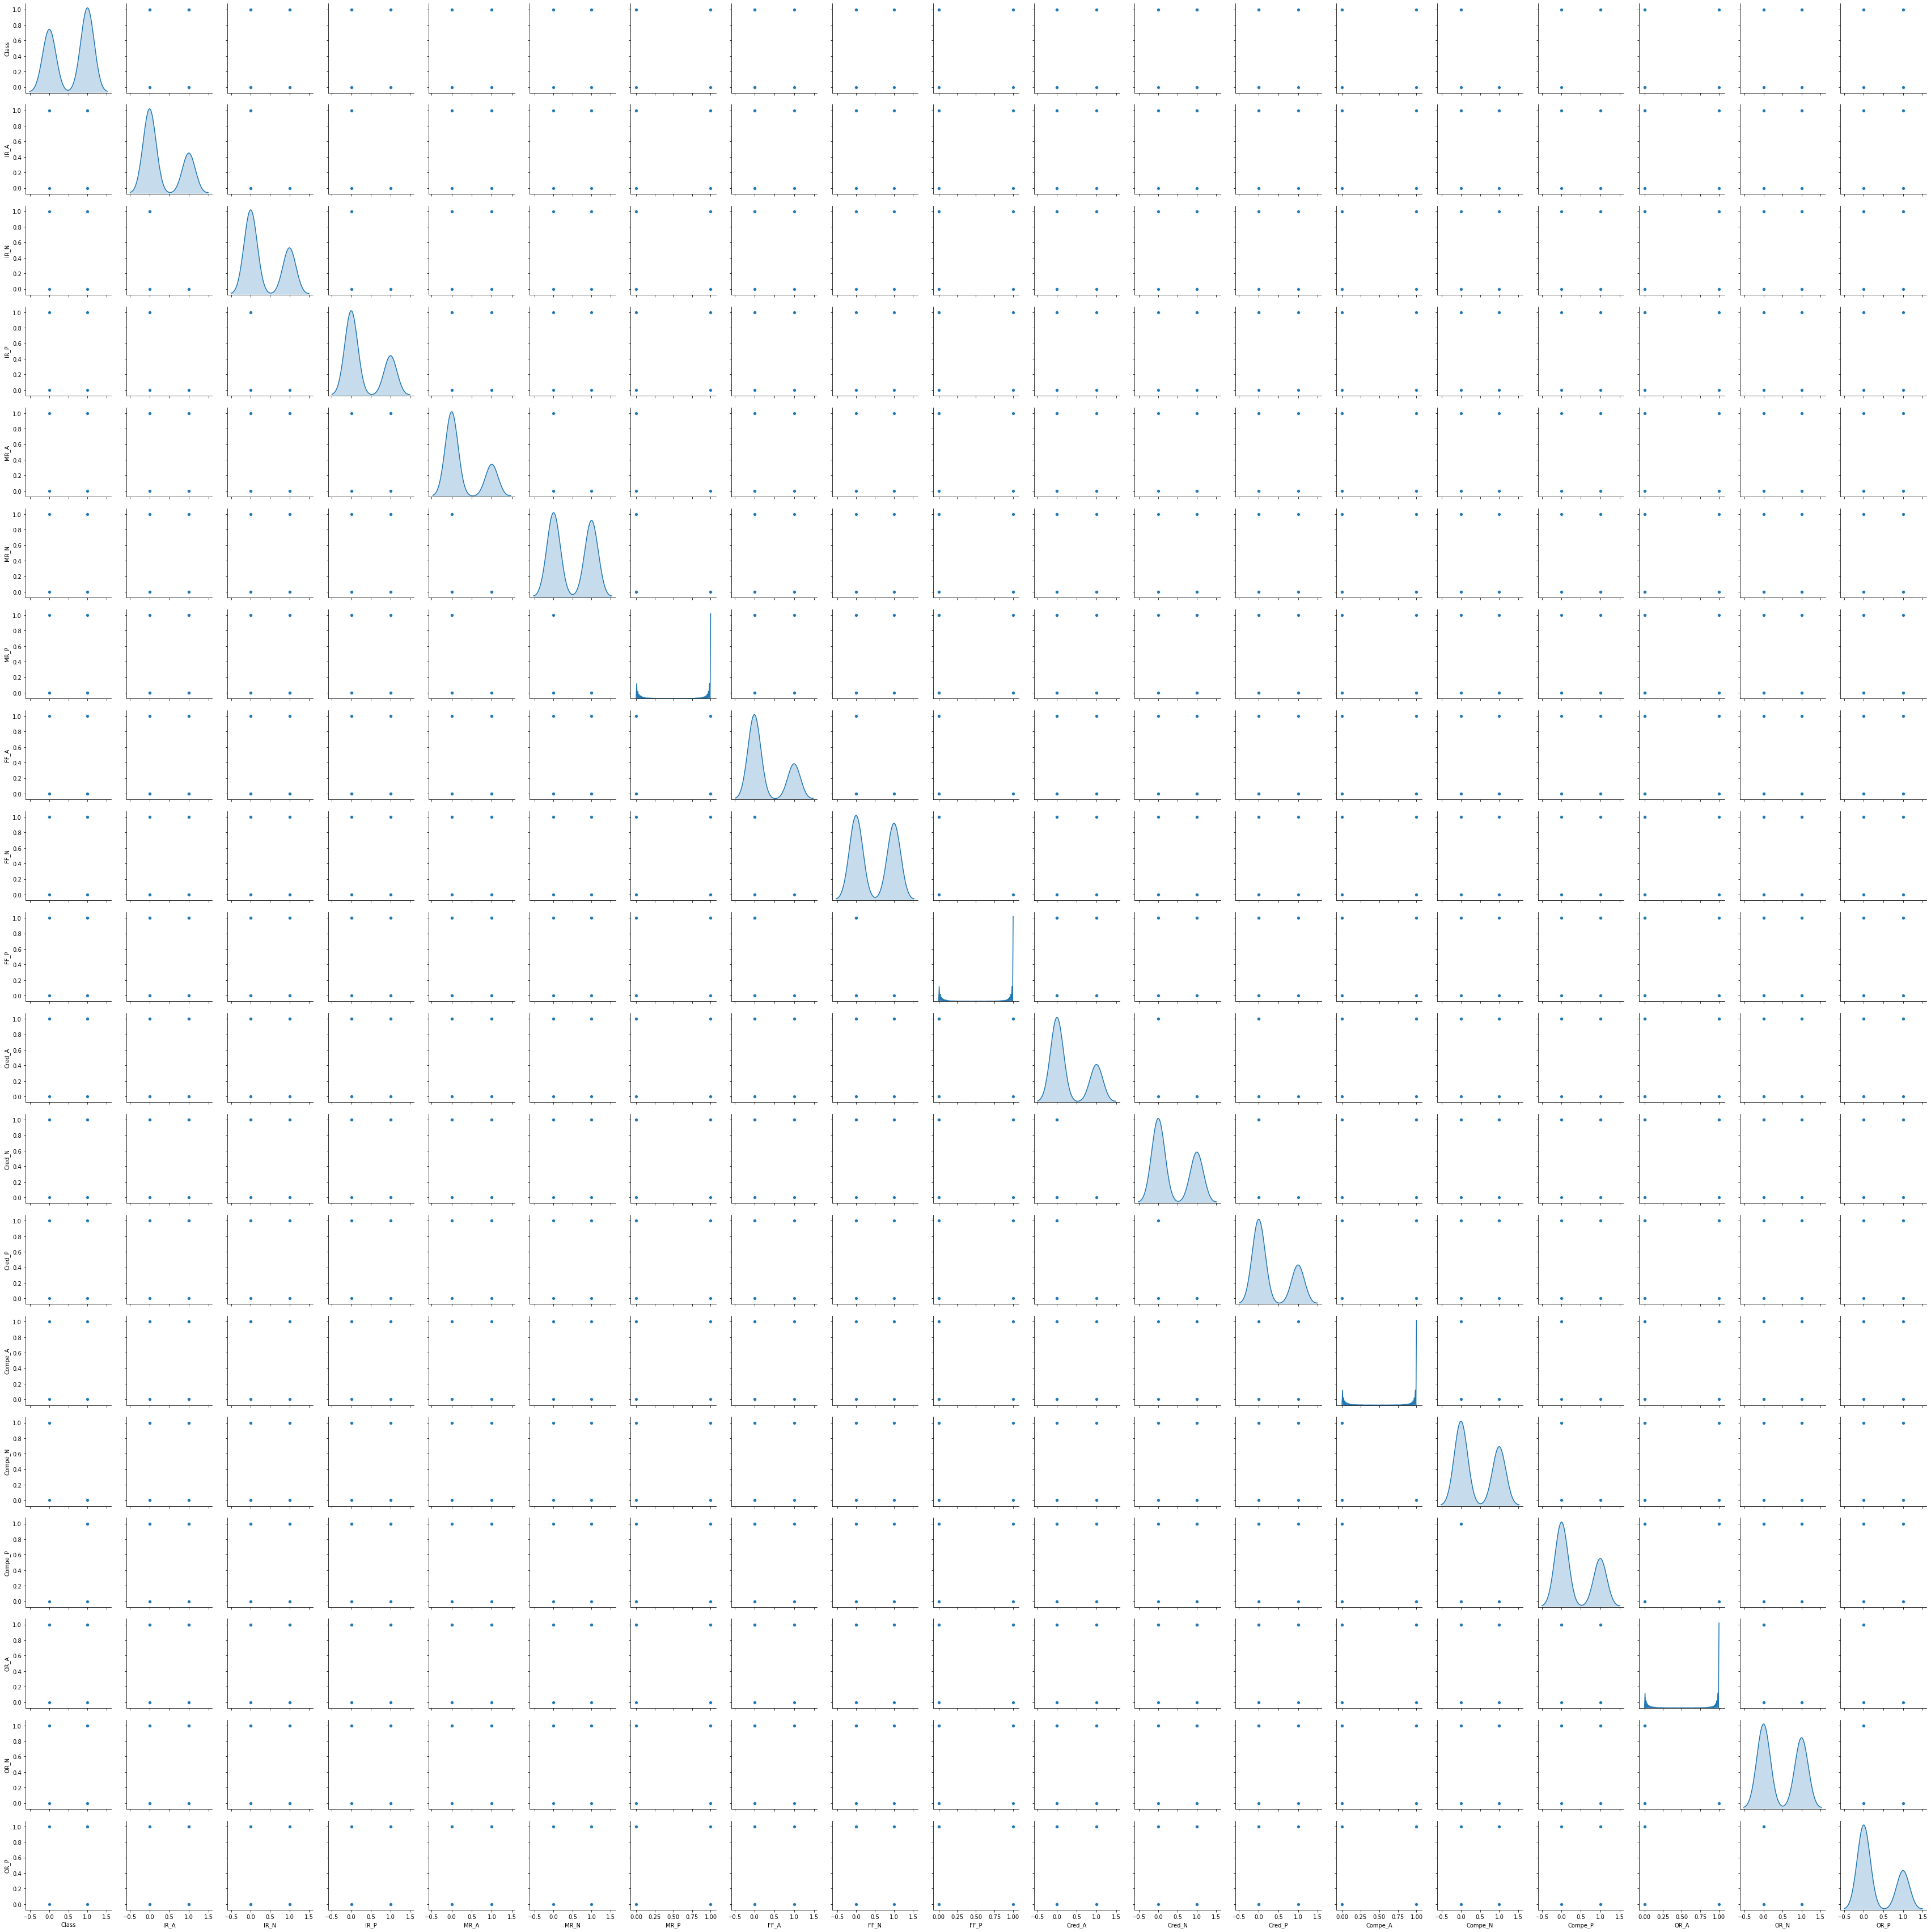

In [35]:
sns.pairplot(df,diag_kind='kde')

In [36]:
df.describe()


,Class,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.572000,0.324000,0.356000,0.320000,0.276000,0.476000,0.248000,0.296000,0.476000,0.228000,0.308000,0.376000,0.316000,0.224000,0.412000,0.364000,0.228000,0.456000,0.316000
std,0.495781,0.468939,0.479776,0.467412,0.447914,0.500426,0.432718,0.457407,0.500426,0.420384,0.462593,0.485352,0.465846,0.417758,0.493182,0.482114,0.420384,0.499059,0.465846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.corr()

,Class,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,Cred_A,Cred_N,Cred_P,Compe_A,Compe_N,Compe_P,OR_A,OR_N,OR_P
Class,1.000000,0.115183,-0.251705,0.142803,0.118131,-0.357219,0.290834,0.490059,-0.826646,0.450823,0.279406,-0.780553,0.535782,0.387186,-0.967690,0.654404,0.007631,-0.246848,0.257562
IR_A,0.115183,1.000000,-0.514732,-0.474919,0.279995,-0.283335,0.037841,0.037896,0.024712,-0.070651,0.000963,-0.096273,0.099348,0.079049,-0.093285,0.026930,0.214560,-0.187668,0.007427
IR_N,-0.251705,-0.514732,1.000000,-0.510038,-0.309552,0.395364,-0.136804,-0.079497,0.127729,-0.065550,-0.007455,0.060984,-0.056135,-0.118941,0.277201,-0.180501,-0.045638,0.174707,-0.145979
IR_P,0.142803,-0.474919,-0.510038,1.000000,0.036831,-0.121561,0.102458,0.043580,-0.155900,0.138166,0.006687,0.033990,-0.042053,0.042780,-0.190943,0.158257,-0.168415,0.008953,0.142389
MR_A,0.118131,0.279995,-0.309552,0.036831,1.000000,-0.588468,-0.354570,0.050495,-0.086790,0.048373,-0.043649,0.019508,0.023019,-0.095637,-0.098682,0.183819,0.176344,-0.116133,-0.034722
MR_N,-0.357219,-0.283335,0.395364,-0.121561,-0.588468,1.000000,-0.547337,-0.179382,0.278337,-0.136153,-0.080705,0.252258,-0.182679,-0.089444,0.324994,-0.254951,0.035661,0.156563,-0.199907
MR_P,0.290834,0.037841,-0.136804,0.102458,-0.354570,-0.547337,1.000000,0.155182,-0.232051,0.107385,0.138515,-0.311922,0.187435,0.202434,-0.273698,0.104570,-0.223777,-0.060849,0.267127
FF_A,0.490059,0.037896,-0.079497,0.043580,0.050495,-0.179382,0.155182,1.000000,-0.618013,-0.352386,0.174769,-0.394799,0.237781,0.324168,-0.471563,0.201493,-0.059984,-0.101056,0.162391
FF_N,-0.826646,0.024712,0.127729,-0.155900,-0.086790,0.278337,-0.232051,-0.618013,1.000000,-0.517960,-0.306236,0.649099,-0.372180,-0.358389,0.796896,-0.504642,0.073842,0.108321,-0.182679
FF_P,0.450823,-0.070651,-0.065550,0.138166,0.048373,-0.136153,0.107385,-0.352386,-0.517960,1.000000,0.174383,-0.343119,0.184321,0.073910,-0.435532,0.381488,-0.022634,-0.018990,0.040769


# Separate the dependant variable from the rest of the train data 2 point

In [38]:
X=df.drop(labels='Class',axis=1) 
y=df['Class']

# Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [97]:
from sklearn.model_selection import train_test_split
#  20% for test set and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 18)
(50, 18)
(200,)
(50,)


# Apply PCA on the independent features of train data. 2 point

In [109]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components =  None)
pca.fit(X_train)
variance = pca.explained_variance_ratio_

In [110]:
variance

array([2.64822015e-01, 1.20280256e-01, 1.02611778e-01, 9.54895186e-02,
       8.64305227e-02, 7.69549874e-02, 6.56777876e-02, 5.52021682e-02,
       5.09782423e-02, 4.26882020e-02, 2.56989345e-02, 1.31655888e-02,
       1.62783017e-32, 5.18971680e-33, 3.08174948e-33, 2.63163943e-33,
       1.28729429e-33, 1.37915573e-34])

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). No of components are 10

Text(0, 0.5, 'cumulative explained variance')

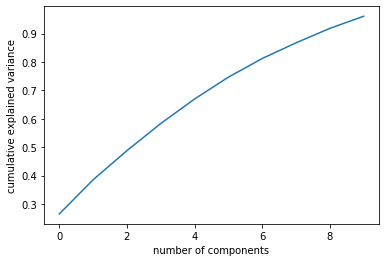

In [127]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [128]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [129]:
var1

array([26.48, 38.51, 48.77, 58.32, 66.96, 74.66, 81.23, 86.75, 91.85,
       96.12])

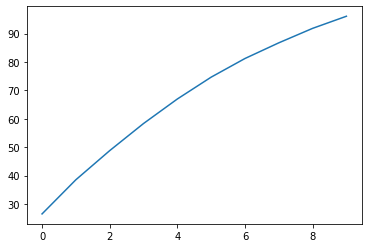

In [130]:
plt.plot(var1)

# Transform the data using PCA ( select optimum number of PCs).

In [121]:
pca = PCA(n_components = 10 )
# X_Train_centered = X_train - X_train.mean(axis=0)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
# X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [122]:
X_train_pca.shape

(200, 10)

In [123]:
X_train_pca

array([[ 0.95295468, -1.20953342,  0.2937245 , ...,  0.10586552,
         0.22220117, -0.39040299],
       [ 0.25297754, -0.61629947, -0.40891285, ..., -0.36258331,
        -0.81337669, -0.79840085],
       [-0.32975663,  0.9497441 ,  1.09512635, ...,  0.18692469,
         0.04462538, -0.30899818],
       ...,
       [-0.71896473,  0.73697796, -0.44007938, ...,  0.95744984,
        -0.18105175, -0.4960935 ],
       [ 1.15255492, -0.90486306, -0.38223782, ...,  0.21901948,
        -0.58034951,  0.19478586],
       [-0.82621474, -0.24894389,  0.095425  , ..., -0.32025008,
        -0.82593176,  0.11015246]])

In [124]:
explained_variance

array([0.26482201, 0.12028026, 0.10261178, 0.09548952, 0.08643052,
       0.07695499, 0.06567779, 0.05520217, 0.05097824, 0.0426882 ])

# Apply KMeans algorithm on the above transformed data. 6 points

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

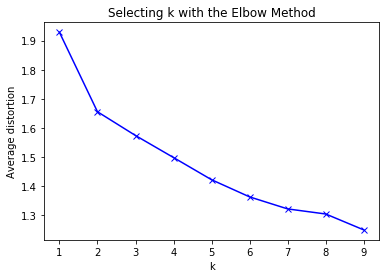

In [126]:
from sklearn.cluster import KMeans
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_pca)
    prediction=model.predict(X_train_pca)
    meanDistortions.append(sum(np.min(cdist(X_train_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Create a new column in the train data and populate it with the cluster labels.

In [92]:
df_labels = pd.DataFrame(model.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels']

In [143]:
df_labels

,labels
0,1
1,5
2,2
3,5
4,1
5,0
6,0
7,0
8,8
9,4


In [139]:
df1=pd.DataFrame(data=X_train_pca)

In [141]:
df1['labels'] = model.labels_

df1.groupby(["labels"]).count()

,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,22,22,22,22,22,22,22,22,22,22
1,24,24,24,24,24,24,24,24,24,24
2,22,22,22,22,22,22,22,22,22,22
3,19,19,19,19,19,19,19,19,19,19
4,19,19,19,19,19,19,19,19,19,19
5,26,26,26,26,26,26,26,26,26,26
6,36,36,36,36,36,36,36,36,36,36
7,21,21,21,21,21,21,21,21,21,21
8,11,11,11,11,11,11,11,11,11,11


# Transform the test data using the same PCA object that was fit on the train data. 4 points

In [131]:

X_test_pca=pca.transform(X_test)

In [132]:
X_test_pca

array([[-0.28280618, -0.31772065,  1.00129814,  0.51300203, -0.61472864,
         0.5708791 ,  0.09839624, -0.31274891, -0.10925493,  0.07392998],
       [ 0.54287013, -0.19261011, -0.34301766,  0.09914053,  0.51480508,
         0.76813907, -0.82441808,  0.93253178, -0.3488148 ,  0.66918932],
       [ 0.88631719, -0.75230069, -0.18990829,  0.46284224, -0.74085252,
        -0.88335969,  0.47069231,  0.09133385, -0.38180652,  0.33545888],
       [ 1.32108607, -0.4552299 ,  0.04103722, -0.04383009, -0.27666508,
        -0.4534792 , -0.00216257,  0.29224009, -0.71546968, -0.43828691],
       [-1.37303787, -0.30148317,  0.14122798,  0.64680609,  0.52946599,
         0.0982521 , -0.81852512, -0.7980049 ,  0.33534755, -0.3306589 ],
       [ 0.94398645, -0.75862639,  0.58990204,  1.0441971 , -0.40718967,
         0.09589607, -0.40616321,  0.11700101,  0.36481192,  0.08090969],
       [-0.33788408, -0.07249135, -0.03008502, -0.4557998 ,  0.83408946,
        -0.54493086,  0.52163408, -0.56529885

# Model,accuracy and confusion matrix

In [134]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(pca.transform(X_train), y_train)

C:\Users\SKUMARJH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
model1.score(pca.transform(X_test), y_test)

1.0

In [136]:
y_predict = model.predict(pca.transform(X_test))

In [138]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[ 0  3  0  0  0  0 12  5  1]
 [ 5  0  9  5  5  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
